From looking back at the SEM images (on Google Drive), it looks like the platelet side angle is around 45 degrees (111) or (011), or 64 degrees (221) or (021).

- Get surface energies -> Predicted Wolff shape _in vacuo_
- Get charge density and `LOCPOT` plots, then predict stabilising effects of different solvents (dipoles) for different surfaces based on this -> Estimation of nanocrystal shapes in solution
- From this shit, compare to experiment and predict whether we're looking at kinetic or thermodynamic control
- Surface density (per area) of adsorption sites -> Determines stabilising effects?

Maybe (but realistically, fuck this):
- Pymatgen identify possible surface sites, put water and EtOH there, Google and wiki how to do adsorption shit
Plethora of possible problems here: To account for chemical potentials, would need to do liquid water, ethanol etc. calculations (can we do this accurately with periodic DFT, with all the dynamical shit of a liquid etc?), need to do supercell calculations of pure solvent (to account for 'surface energy' when breaking water-water bonds to form water-SnO), likely to be many possible surface adsorption arrangements/coverages etc...
- Mention to Sonia; to do more specific investigation on solvent effects etc. would require a large number of Molecular Dynamics simulations etc. (i.e. beyond the scope of this work)

## Structural Relaxation

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

In [2]:
with MPRester() as mpr:
    snostrucs = mpr.get_entries('SnO',sort_by_e_above_hull=True)
snostrucs[0]

ComputedEntry mp-2097 - Sn2 O2
Energy = -23.0620
Correction = -1.4046
Parameters:
run_type = GGA
is_hubbard = False
pseudo_potential = {'functional': 'PBE', 'labels': ['Sn_d', 'O'], 'pot_type': 'paw'}
hubbards = {}
potcar_symbols = ['PBE Sn_d', 'PBE O']
oxide_type = oxide
Data:
oxide_type = oxide
e_above_hull = 0

In [3]:
with MPRester() as mpr:
    snostruc = mpr.get_structure_by_material_id('mp-2097')

In [12]:
vdwpbesolconfig = {'INCAR': {'LASPH': True, 'NCORE': 12, 'KPAR': 2, 'ALGO': 'Normal', 'GGA':'PS',
                             'IVDW': "12 # Grimme's D3 VDW dispersion correction",
                          'EDIFF': 1e-07, 'EDIFFG': -0.003, 'ENCUT': 700, 'NEDOS': 2000,
                          'ADDGRID': True,
                    'IBRION': 1, 'ICHARG': 1, 'ISIF': 3, 'ISMEAR': 0, 'ISPIN': "1 # No mag, checked", 'LORBIT': 11,
                    'LREAL': 'False', 'LWAVE': True, 'NELM': 100, 'NSW': 100, 'PREC': 'Accurate',
                    'SIGMA': 0.05, 'MAGMOM': {'Ce': 5, 'Ce3+': 1, 'Co': 5, 'Co3+': 0.6, 'Co4+': 1,
                                              'Cr': 5, 'Dy3+': 5, 'Er3+': 3, 'Eu': 10, 'Eu2+': 7,
                                              'Eu3+': 6, 'Fe': 5, 'Gd3+': 7, 'Ho3+': 4, 'La3+': 0.6,
                                              'Lu3+': 0.6, 'Mn': 5, 'Mn3+': 4, 'Mn4+': 3, 'Mo': 5,
                                              'Nd3+': 3, 'Ni': 5, 'Pm3+': 4, 'Pr3+': 2, 'Sm3+': 5,
                                              'Tb3+': 6, 'Tm3+': 2, 'V': 5, 'W': 5, 'Yb3+': 1}},
          'KPOINTS': {'reciprocal_density': 600},
          'POTCAR': {'Ac': 'Ac', 'Ag': 'Ag', 'Al': 'Al', 'Ar': 'Ar', 'As': 'As', 'Au': 'Au', 'B': 'B', 'Ba':
                     'Ba_sv', 'Be': 'Be_sv', 'Bi': 'Bi', 'Br': 'Br', 'C': 'C', 'Ca': 'Ca_sv', 'Cd': 'Cd', 'Ce': 'Ce',
                              'Cl': 'Cl', 'Co': 'Co', 'Cr': 'Cr_pv', 'Cs': 'Cs_sv', 'Cu': 'Cu_pv', 'Dy': 'Dy_3', 'Er': 'Er_3',
                              'Eu': 'Eu', 'F': 'F', 'Fe': 'Fe_pv', 'Ga': 'Ga_d', 'Gd': 'Gd', 'Ge': 'Ge_d', 'H': 'H', 'He': 'He',
                              'Hf': 'Hf_pv', 'Hg': 'Hg', 'Ho': 'Ho_3', 'I': 'I', 'In': 'In_d', 'Ir': 'Ir', 'K': 'K_sv', 'Kr': 'Kr',
                              'La': 'La', 'Li': 'Li_sv', 'Lu': 'Lu_3', 'Mg': 'Mg_pv', 'Mn': 'Mn_pv', 'Mo': 'Mo_pv', 'N': 'N',
                              'Na': 'Na_pv', 'Nb': 'Nb_pv', 'Nd': 'Nd_3', 'Ne': 'Ne', 'Ni': 'Ni_pv', 'Np': 'Np', 'O': 'O',
                              'Os': 'Os_pv', 'P': 'P', 'Pa': 'Pa', 'Pb': 'Pb_d', 'Pd': 'Pd', 'Pm': 'Pm_3', 'Pr': 'Pr_3', 'Pt': 'Pt',
                              'Pu': 'Pu', 'Rb': 'Rb_sv', 'Re': 'Re_pv', 'Rh': 'Rh_pv', 'Ru': 'Ru_pv', 'S': 'S', 'Sb': 'Sb',
                              'Sc': 'Sc_sv', 'Se': 'Se', 'Si': 'Si', 'Sm': 'Sm_3', 'Sn': 'Sn_d', 'Sr': 'Sr_sv', 'Ta': 'Ta_pv',
                              'Tb': 'Tb_3', 'Tc': 'Tc_pv', 'Te': 'Te', 'Th': 'Th', 'Ti': 'Ti_pv', 'Tl': 'Tl_d', 'Tm': 'Tm_3',
                              'U': 'U', 'V': 'V_pv', 'W': 'W_pv', 'Xe': 'Xe', 'Y': 'Y_sv', 'Yb': 'Yb_2', 'Zn': 'Zn', 'Zr': 'Zr_sv'}}

In [10]:
from pymatgen.io.vasp.sets import DictSet, VaspInput
sno_input = DictSet(snostruc, config_dict=vdwpbesolconfig)

Writing the input set to file

In [11]:
sno_input.write_input('./VASP_Files/')

PBEsol: - `ENCUT = 850`, **_k_**-mesh = $7\times7\times5$

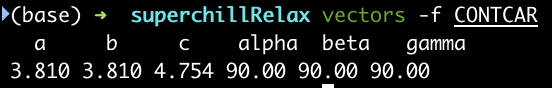

PBEsol + D3: - `ENCUT = 850`, **_k_**-mesh = $6\times6\times4$

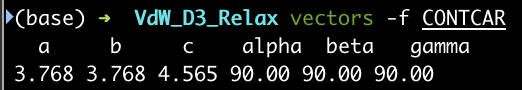

PBEsol + SOC + D3: - `ENCUT = 850`, **_k_**-mesh = $6\times6\times4$

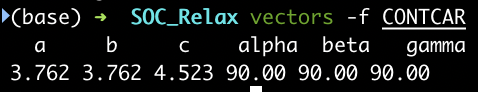

PBE + D3: - `ENCUT = 850`, **_k_**-mesh = $6\times6\times4$

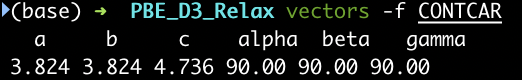

PBE + SOC + D3: - `ENCUT = 850`, **_k_**-mesh = $6\times6\times4$

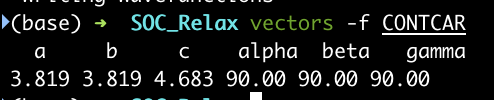

optB86b-vdW: - `ENCUT = 850`, **_k_**-mesh = $6\times6\times4$

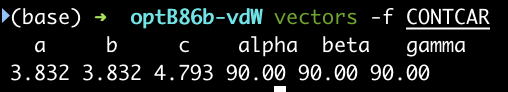

optB86b-vdW + SOC: -> Don't think you can do SOC with optB86b-vdW

SCAN+rVV10: - `ENCUT = 850`, **_k_**-mesh = $6\times6\times4$ (Meta-GGA)   
(Seems to be good for layered solids - https://journals.aps.org/prmaterials/abstract/10.1103/PhysRevMaterials.3.063602)(https://journals.aps.org/prx/abstract/10.1103/PhysRevX.6.041005)   
While the structure prediction seems to be mediocre (mean relative error of 1.8% to optB86b-vdW's 0.5%), the interlayer binding energy is very good (mean error of 1 meV per angstrom squared, compared to optB86b-vdW's 7)

Yeah but fuck it let's use optB86b-vdW because:
- It's cheaper
- 7 meV is still pretty fuckin negligible relative to the errors from using vacuum rather than solution etc.
- SCAN+rVV10 slabs being a right c@&t to converge (on `ImpHPC`)

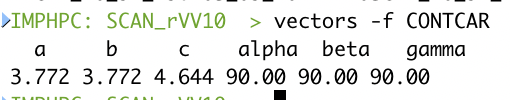

SOC not possible with SCAN_rVV10 by the looks of it.

SCAN: - `ENCUT = 850`, **_k_**-mesh = $6\times6\times4$ (Meta-GGA)   

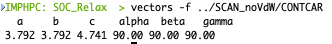

SCAN+SOC: - `ENCUT = 850`, **_k_**-mesh = $6\times6\times4$ (Meta-GGA)   

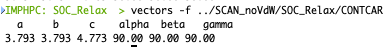

From Hoye's "Perovskite-Inspired..."
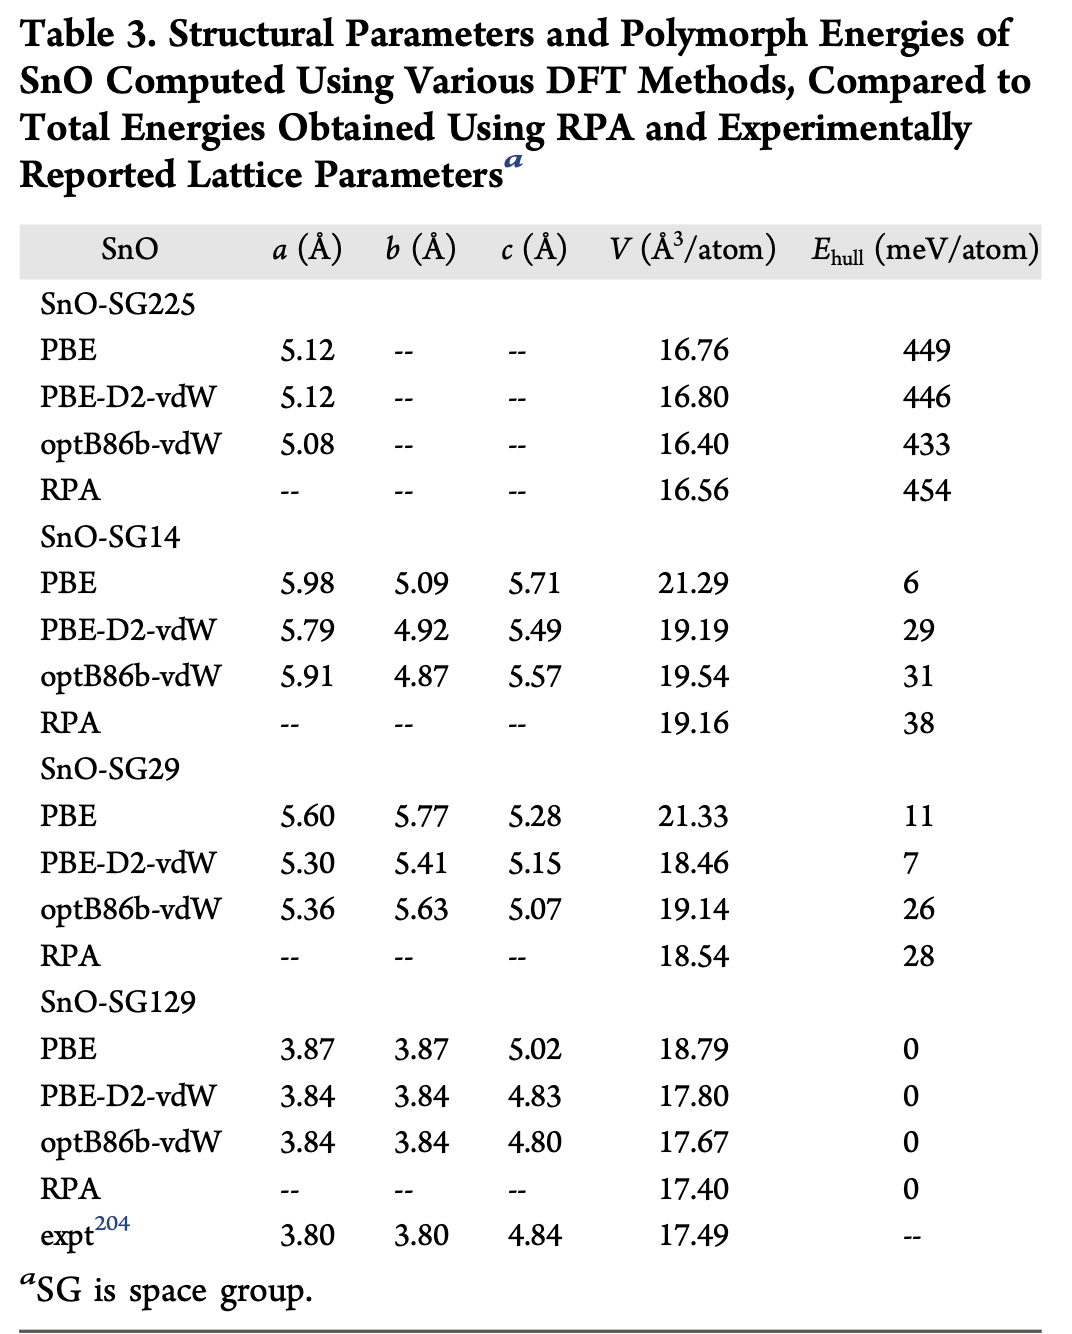

### Experimental:

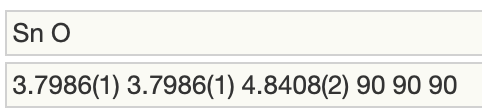    
(ICSD 11516)

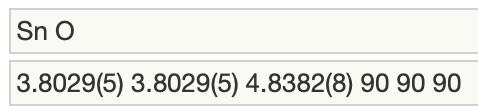   
(ICSD 16481)

## Slab Calculations

### Let's go with `optB86b-vdW`

In [4]:
from pymatgen.core.surface import SlabGenerator, generate_all_slabs, Structure, Lattice
import pymatgen.symmetry.analyzer as pmgsyman

In [5]:
optB86bvdW_relaxed = Structure.from_file("VASP_Files/optB86b-vdW/CONTCAR")
optB86bvdW_relaxed.add_oxidation_state_by_guess()

In [6]:
optB86bvdW_relaxed

Structure Summary
Lattice
    abc : 3.8321500113692926 3.8321500113692926 4.792723931047374
 angles : 90.0 90.0 90.0
 volume : 70.3829420145544
      A : 3.8321500113692926 -0.0 0.0
      B : -1e-16 3.8321500113692926 0.0
      C : -0.0 0.0 4.792723931047374
PeriodicSite: Sn2+ (2.8741, 2.8741, 1.1614) [0.7500, 0.7500, 0.2423]
PeriodicSite: Sn2+ (0.9580, 0.9580, 3.6313) [0.2500, 0.2500, 0.7577]
PeriodicSite: O2- (0.9580, 2.8741, 0.0000) [0.2500, 0.7500, 0.0000]
PeriodicSite: O2- (2.8741, 0.9580, 0.0000) [0.7500, 0.2500, 0.0000]

In [5]:
spganalyse_opt = pmgsyman.SpacegroupAnalyzer(optB86bvdW_relaxed)

In [27]:
import numpy as np
# Symmetry test
for i in np.arange(1,20):
    spganalyse_opt_symtest = pmgsyman.SpacegroupAnalyzer(optB86bvdW_relaxed, symprec=(10.0)**(-i))
    print(f"Symprec = {(10.0)**(-i)}")
    print(spganalyse_opt_symtest.get_space_group_number())

Symprec = 0.1
129
Symprec = 0.01
129
Symprec = 0.001
129
Symprec = 0.0001
129
Symprec = 1e-05
129
Symprec = 1e-06
129
Symprec = 1e-07
129
Symprec = 1e-08
129
Symprec = 1e-09
129
Symprec = 1e-10
129
Symprec = 1e-11
129
Symprec = 1e-12
129
Symprec = 1e-13
129
Symprec = 1e-14
129
Symprec = 1e-15
99
Symprec = 1e-16
99
Symprec = 1e-17
99
Symprec = 1e-18
99
Symprec = 1e-19
99


In [9]:
spganalyse_opt.get_conventional_standard_structure() # Conventional and primitive are the same thing for SnO

Structure Summary
Lattice
    abc : 3.8321500113692926 3.8321500113692926 4.792723931047374
 angles : 90.0 90.0 90.0
 volume : 70.3829420145544
      A : 3.8321500113692926 0.0 2.346515122637949e-16
      B : -2.346515122637949e-16 3.8321500113692926 2.346515122637949e-16
      C : 0.0 0.0 4.792723931047374
PeriodicSite: Sn2+ (-0.0000, 1.9161, 1.1614) [0.0000, 0.5000, 0.2423]
PeriodicSite: Sn2+ (1.9161, 0.0000, 3.6313) [0.5000, 0.0000, 0.7577]
PeriodicSite: O2- (1.9161, 1.9161, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: O2- (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]

In [6]:
optB86bvdW_slabs = generate_all_slabs(optB86bvdW_relaxed, max_index=2, min_slab_size=30, min_vacuum_size=30, lll_reduce=True)

In [7]:
for slab in optB86bvdW_slabs:
    print(slab.miller_index,slab.dipole)

(1, 1, 1) [ 3.75400740e-15 -1.63998541e+00 -6.13075934e+01]
(1, 1, 1) [-7.88860905e-31  1.77635684e-15  7.10542736e-15]
(2, 2, 1) [ 3.82956077e-15  2.22951335e+00 -6.25414735e+01]
(2, 2, 1) [ 6.70531769e-30  3.55271368e-15 -2.45137244e-13]
(1, 1, 0) [ 3.98216821e-15  3.98216821e-15 -6.50337422e+01]
(2, 1, 2) [-5.99520433e-15  6.66133815e-16 -1.06581410e-14]
(2, 1, 2) [-2.44249065e-15 -1.49880108e-15  1.77635684e-14]
(2, 1, 1) [1.33226763e-15 3.21964677e-15 3.55271368e-15]
(2, 1, 1) [-1.96250872 -1.32245307 64.50553033]
(2, 1, 0) [ 9.86076132e-31 -3.33066907e-15 -6.03961325e-14]
(1, 0, 1) [-4.02885007e-15 -2.57639886e+00  6.57961149e+01]
(1, 0, 1) [ 1.57772181e-30  1.55431223e-15 -6.03961325e-14]
(2, 0, 1) [-3.91021058e-15  4.94537011e+00  6.38585849e+01]
(2, 0, 1) [ 9.07190041e-30 -4.88498131e-15 -6.39488462e-14]
(1, 0, 0) [-9.86076132e-31 -1.18329136e-30  0.00000000e+00]
(1, 1, 2) [ 5.12759588e-30 -1.11022302e-16  4.97379915e-14]
(1, 0, 2) [ 1.10440527e-29  8.43769499e-15 -1.45661261e

In [8]:
dipole_free_slabs = []
for slab in optB86bvdW_slabs:
    if not slab.is_polar():
        dipole_free_slabs.append(slab)

In [12]:
for slab in dipole_free_slabs:
    print(slab.miller_index,slab.dipole)

(1, 1, 1) [-7.88860905e-31  1.77635684e-15  7.10542736e-15]
(2, 2, 1) [ 6.70531769e-30  3.55271368e-15 -2.45137244e-13]
(2, 1, 2) [-5.99520433e-15  6.66133815e-16 -1.06581410e-14]
(2, 1, 2) [-2.44249065e-15 -1.49880108e-15  1.77635684e-14]
(2, 1, 1) [1.33226763e-15 3.21964677e-15 3.55271368e-15]
(2, 1, 0) [ 9.86076132e-31 -3.33066907e-15 -6.03961325e-14]
(1, 0, 1) [ 1.57772181e-30  1.55431223e-15 -6.03961325e-14]
(2, 0, 1) [ 9.07190041e-30 -4.88498131e-15 -6.39488462e-14]
(1, 0, 0) [-9.86076132e-31 -1.18329136e-30  0.00000000e+00]
(1, 1, 2) [ 5.12759588e-30 -1.11022302e-16  4.97379915e-14]
(1, 0, 2) [ 1.10440527e-29  8.43769499e-15 -1.45661261e-13]
(1, 0, 2) [ 9.66354609e-30  7.10542736e-15 -1.74082970e-13]
(0, 0, 1) [ 3.94430453e-30  3.94430453e-30 -8.52651283e-14]


In [43]:
# Checking the slabs are symmetric, which they are yuppah
for slab in dipole_free_slabs: 
    print(slab.miller_index, slab.is_polar(), slab.is_symmetric(symprec = 0.0001))
    spganalyse_opt_slabsymtest = pmgsyman.SpacegroupAnalyzer(slab)
    print(spganalyse_opt_slabsymtest.get_space_group_symbol()) # For the 'P-1' slabs, I don't think we need to worry 
    # about this, because according to slab.is_symmetric(), the actual slab (no vacuum) still has inversion symmetry,
    # it's just with the vacuum included in the structure (i.e. with SpaceGroupAnalyzer), it goes to shit 'P-1'

(1, 1, 1) False True
C2/m
(2, 2, 1) False True
C2/m
(2, 1, 2) False True
P-1
(2, 1, 2) False True
P-1
(2, 1, 1) False True
P-1
(2, 1, 0) False True
P-1
(1, 0, 1) False True
P2_1/m
(2, 0, 1) False True
P2_1/m
(1, 0, 0) False True
P2_1/m
(1, 1, 2) False True
P2_1/m
(1, 0, 2) False True
P2_1/m
(1, 0, 2) False True
P2_1/m
(0, 0, 1) False True
P4/nmm


In [21]:
vasppotcardict = {'POTCAR': {'Ac': 'Ac', 'Ag': 'Ag', 'Al': 'Al', 'Ar': 'Ar', 'As': 'As', 'Au': 'Au', 'B': 'B', 'Ba':
                             'Ba_sv', 'Be': 'Be_sv', 'Bi': 'Bi', 'Br': 'Br', 'C': 'C', 'Ca': 'Ca_sv', 'Cd': 'Cd', 'Ce': 'Ce',
                             'Cl': 'Cl', 'Co': 'Co', 'Cr': 'Cr_pv', 'Cs': 'Cs_sv', 'Cu': 'Cu_pv', 'Dy': 'Dy_3', 'Er': 'Er_3',
                             'Eu': 'Eu', 'F': 'F', 'Fe': 'Fe_pv', 'Ga': 'Ga_d', 'Gd': 'Gd', 'Ge': 'Ge_d', 'H': 'H', 'He': 'He',
                             'Hf': 'Hf_pv', 'Hg': 'Hg', 'Ho': 'Ho_3', 'I': 'I', 'In': 'In_d', 'Ir': 'Ir', 'K': 'K_sv', 'Kr': 'Kr',
                             'La': 'La', 'Li': 'Li_sv', 'Lu': 'Lu_3', 'Mg': 'Mg_pv', 'Mn': 'Mn_pv', 'Mo': 'Mo_pv', 'N': 'N',
                             'Na': 'Na_pv', 'Nb': 'Nb_pv', 'Nd': 'Nd_3', 'Ne': 'Ne', 'Ni': 'Ni_pv', 'Np': 'Np', 'O': 'O',
                             'Os': 'Os_pv', 'P': 'P', 'Pa': 'Pa', 'Pb': 'Pb_d', 'Pd': 'Pd', 'Pm': 'Pm_3', 'Pr': 'Pr_3', 'Pt': 'Pt',
                             'Pu': 'Pu', 'Rb': 'Rb_sv', 'Re': 'Re_pv', 'Rh': 'Rh_pv', 'Ru': 'Ru_pv', 'S': 'S', 'Sb': 'Sb',
                             'Sc': 'Sc_sv', 'Se': 'Se', 'Si': 'Si', 'Sm': 'Sm_3', 'Sn': 'Sn_d', 'Sr': 'Sr_sv', 'Ta': 'Ta_pv',
                             'Tb': 'Tb_3', 'Tc': 'Tc_pv', 'Te': 'Te', 'Th': 'Th', 'Ti': 'Ti_pv', 'Tl': 'Tl_d', 'Tm': 'Tm_3',
                             'U': 'U', 'V': 'V_pv', 'W': 'W_pv', 'Xe': 'Xe', 'Y': 'Y_sv', 'Yb': 'Yb_2', 'Zn': 'Zn', 'Zr': 'Zr_sv'}}

In [22]:
from pymatgen.io.vasp.inputs import Incar
from pymatgen.io.vasp.sets import DictSet
from monty.io import zopen
import shutil
def optB86bvdW_vasp_files(structure, input_dir=None):
    # Variable parameters first
    optB86bvdWvaspstdincardict = {
        '# May need to change NCORE, KPAR, ENCUT, POTIM': 'variable parameters',
        'GGA': 'MK', 'PARAM1': 0.1234, 'PARAM2': 1.0000, 'LUSE_VDW': True, 'AGGAC': 0.000,
        'NCORE': 12, 'KPAR': 2, 'ENCUT': 850, '#POTIM': 0.5, 'ISPIN': '1',
        'LSUBROT': True,
        'ICORELEVEL': 0,
        'ALGO': 'Normal', 'ADDGRID': True, 'EDIFF': 1e-06, 'EDIFFG': -0.005, 'IBRION': 1,
        'ICHARG': 1, 'ISIF': 2, 'ISMEAR': 0, 'LASPH': True, 'LORBIT': 11,
        'LREAL': False, 'LVHAR': True, 'LWAVE': True, 'NEDOS': 2000, 'NELM': 100, 'NSW': 200,
        'PREC': 'Accurate', 'SIGMA': 0.05}

    # Directory
    optB86bvdWvaspstdinputdir = input_dir +"/"

    # Might need to alter KPOINTS!
    optB86bvdWvaspstdkpts = "Kpoints from JupyterLab\n0\nGamma\n6 6 1"

    optB86bvdWvaspstdincar = Incar.from_dict(optB86bvdWvaspstdincardict)
    optB86bvdWvaspstdinput = DictSet(structure, config_dict=vasppotcardict)
    optB86bvdWvaspstdinput.potcar.write_file(optB86bvdWvaspstdinputdir+'POTCAR') 
    # vaspstdinput.poscar.write_file(vaspstdinputdir+'POSCAR') ## No POSCAR, already generated

    with zopen(optB86bvdWvaspstdinputdir + 'INCAR', "wt") as f:
        f.write(optB86bvdWvaspstdincar.get_string())
    with open(optB86bvdWvaspstdinputdir + 'KPOINTS', "wt") as f:
        f.write(optB86bvdWvaspstdkpts)
    shutil.copyfile('VASP_Files/optB86b-vdW/vdw_kernel.bindat',optB86bvdWvaspstdinputdir+'vdw_kernel.bindat')

### Convergence Testing (wrt Slab and Vacuum thicknesses) for (001)

In [26]:
import os
structure = optB86bvdW_relaxed
# These are distances in Angstroms
dist = [4,7,10,15,20,25,30]
# We iterate through the distances twice, once for vac, once for slab
for vac in dist:
    for thickness in dist:
        slabgen = SlabGenerator(structure, miller_index=(0,0,1), 
                                min_slab_size=thickness, min_vacuum_size =vac, lll_reduce=True)
        slabs = slabgen.get_slabs()
        slab = slabs[1] # <-- put a number in here! 
        #print(slab.miller_index) # just to check!
        if not os.path.exists('VASP_Files/optB86b-vdW/001_Slabs/slab_{0}_{1}/'.format(thickness,vac)):
            os.makedirs('VASP_Files/optB86b-vdW/001_Slabs/slab_{0}_{1}/'.format(thickness,vac))
        slab.to(fmt='poscar', filename='VASP_Files/optB86b-vdW/001_Slabs/slab_{0}_{1}/POSCAR'.format(thickness,vac))
        optB86bvdW_vasp_files(optB86bvdW_relaxed, input_dir='VASP_Files/optB86b-vdW/001_Slabs/slab_{0}_{1}'.format(thickness,vac))

In [26]:
#from pymatgen.entries.computed_entries import ComputedStructureEntry
from pymatgen.io.vasp.outputs import Vasprun
bulk_sno_vasprun = Vasprun("./VASP_Files/optB86b-vdW/bulk_rerun/vasprun.xml")
bulk_sno_entry = bulk_sno_vasprun.get_computed_entry()

In [27]:
import scipy.constants as scpc

In [28]:
import os
from pymatgen.io.vasp.outputs import Vasprun
from pymatgen.analysis.surface_analysis import SlabEntry
zerozeroone_slabs_vaspruns = {}
for root, dirs, files in os.walk("./VASP_Files/optB86b-vdW/001_Slabs/"):
    for name in files:
        if "vasprun" in name:
            #print(os.path.join(root, name))
            zerozeroone_slabs_vaspruns[name] = {'vasprun': Vasprun(os.path.join(root, name)), 'thickness': name[5:7],'vacuum': name[8:10]}
for k,v in zerozeroone_slabs_vaspruns.items():
    v['final_energy'] = v['vasprun'].final_energy
    v['SlabEntry'] = SlabEntry.from_computed_structure_entry(v['vasprun'].get_computed_entry(),(0,0,1))
    v['SurfaceEnergyJm2'] = v['SlabEntry'].surface_energy(bulk_sno_entry)*scpc.electron_volt*10**20 # Convert eV/A^2 to J/m^2
    v['TestSurfaceEnergy'] = ((v['final_energy']-(7*bulk_sno_entry.energy))/(2*14.68537370963767))*scpc.electron_volt*10**20 # Convert eV/A^2 to J/m^2

In [29]:
zerozeroonevac10_thic = []; zerozeroonevac10_energy = []
for k,v in zerozeroone_slabs_vaspruns.items():
    if v['vacuum'] == '10':
        zerozeroonevac10_thic.append(float(v['thickness']))
        zerozeroonevac10_energy.append(v['SurfaceEnergyJm2'])
        zerozeroonevac10 = sorted(zip(zerozeroonevac10_thic, zerozeroonevac10_energy), key = lambda t: t[0])

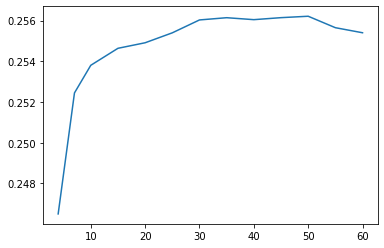

In [30]:
import matplotlib.pyplot as plt
plt.plot(*zip(*zerozeroonevac10))

Hmmm... Let's try with thicknesses up to 60 Angstrom. Ok cool, 10 Angstrom vac, 10 Angstrom slab seems good enough for 001, but other directions might need more (because more broken bonds)

In [236]:
import os
structure = optB86bvdW_relaxed
# These are distances in Angstroms
dist = [35,40,45,50,55,60]
# We iterate through the distances twice, once for vac, once for slab
for thickness in dist:
    vac = 10
    slabgen = SlabGenerator(structure, miller_index=(0,0,1), 
                            min_slab_size=thickness, min_vacuum_size = vac, lll_reduce=True)
    slabs = slabgen.get_slabs()
    slab = slabs[1] # <-- put a number in here! 
    #print(slab.miller_index) # just to check!
    if not os.path.exists('VASP_Files/optB86b-vdW/001_Slabs/slab_{0}_{1}/'.format(thickness,vac)):
        os.makedirs('VASP_Files/optB86b-vdW/001_Slabs/slab_{0}_{1}/'.format(thickness,vac))
    slab.to(fmt='poscar', filename='VASP_Files/optB86b-vdW/001_Slabs/slab_{0}_{1}/POSCAR'.format(thickness,vac))
    optB86bvdW_vasp_files(optB86bvdW_relaxed, input_dir='VASP_Files/optB86b-vdW/001_Slabs/slab_{0}_{1}'.format(thickness,vac))

In [244]:
zerozeroone10_vac = []; zerozeroone15_vac = []; zerozeroone20_vac = []; zerozeroone25_vac = []; zerozeroone30_vac = []
zerozeroone10_energy = []; zerozeroone15_energy = []; zerozeroone20_energy = []; zerozeroone25_energy = []; zerozeroone30_energy = []
for k,v in zerozeroone_slabs_vaspruns.items():
    if v['thickness'] == '10':
        zerozeroone10_vac.append(float(v['vacuum']))
        zerozeroone10_energy.append((float(v['final_energy']) - \
                                       float(zerozeroone_slabs_vaspruns['slab_10_30_vasprun.xml']['final_energy']))*1000)
        zerozeroone10 = sorted(zip(zerozeroone10_vac, zerozeroone10_energy), key = lambda t: t[0])
    if v['thickness'] == '15':
        zerozeroone15_vac.append(float(v['vacuum']))
        zerozeroone15_energy.append((float(v['final_energy']) - \
                                       float(zerozeroone_slabs_vaspruns['slab_15_30_vasprun.xml']['final_energy']))*1000)
        zerozeroone15 = sorted(zip(zerozeroone15_vac, zerozeroone15_energy), key = lambda t: t[0])
    if v['thickness'] == '20':
        zerozeroone20_vac.append(float(v['vacuum']))
        zerozeroone20_energy.append((float(v['final_energy']) - \
                                       float(zerozeroone_slabs_vaspruns['slab_20_30_vasprun.xml']['final_energy']))*1000)
        zerozeroone20 = sorted(zip(zerozeroone20_vac, zerozeroone20_energy), key = lambda t: t[0])
    if v['thickness'] == '25':
        zerozeroone25_vac.append(float(v['vacuum']))
        zerozeroone25_energy.append((float(v['final_energy']) - \
                                       float(zerozeroone_slabs_vaspruns['slab_25_30_vasprun.xml']['final_energy']))*1000)
        zerozeroone25 = sorted(zip(zerozeroone25_vac, zerozeroone25_energy), key = lambda t: t[0])
    if v['thickness'] == '30':
        zerozeroone30_vac.append(float(v['vacuum']))
        zerozeroone30_energy.append((float(v['final_energy']) - \
                                       float(zerozeroone_slabs_vaspruns['slab_30_30_vasprun.xml']['final_energy']))*1000)
        zerozeroone30 = sorted(zip(zerozeroone30_vac, zerozeroone30_energy), key = lambda t: t[0])

In [245]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette(sns.color_palette('bright'))
sns.set_style('darkgrid')

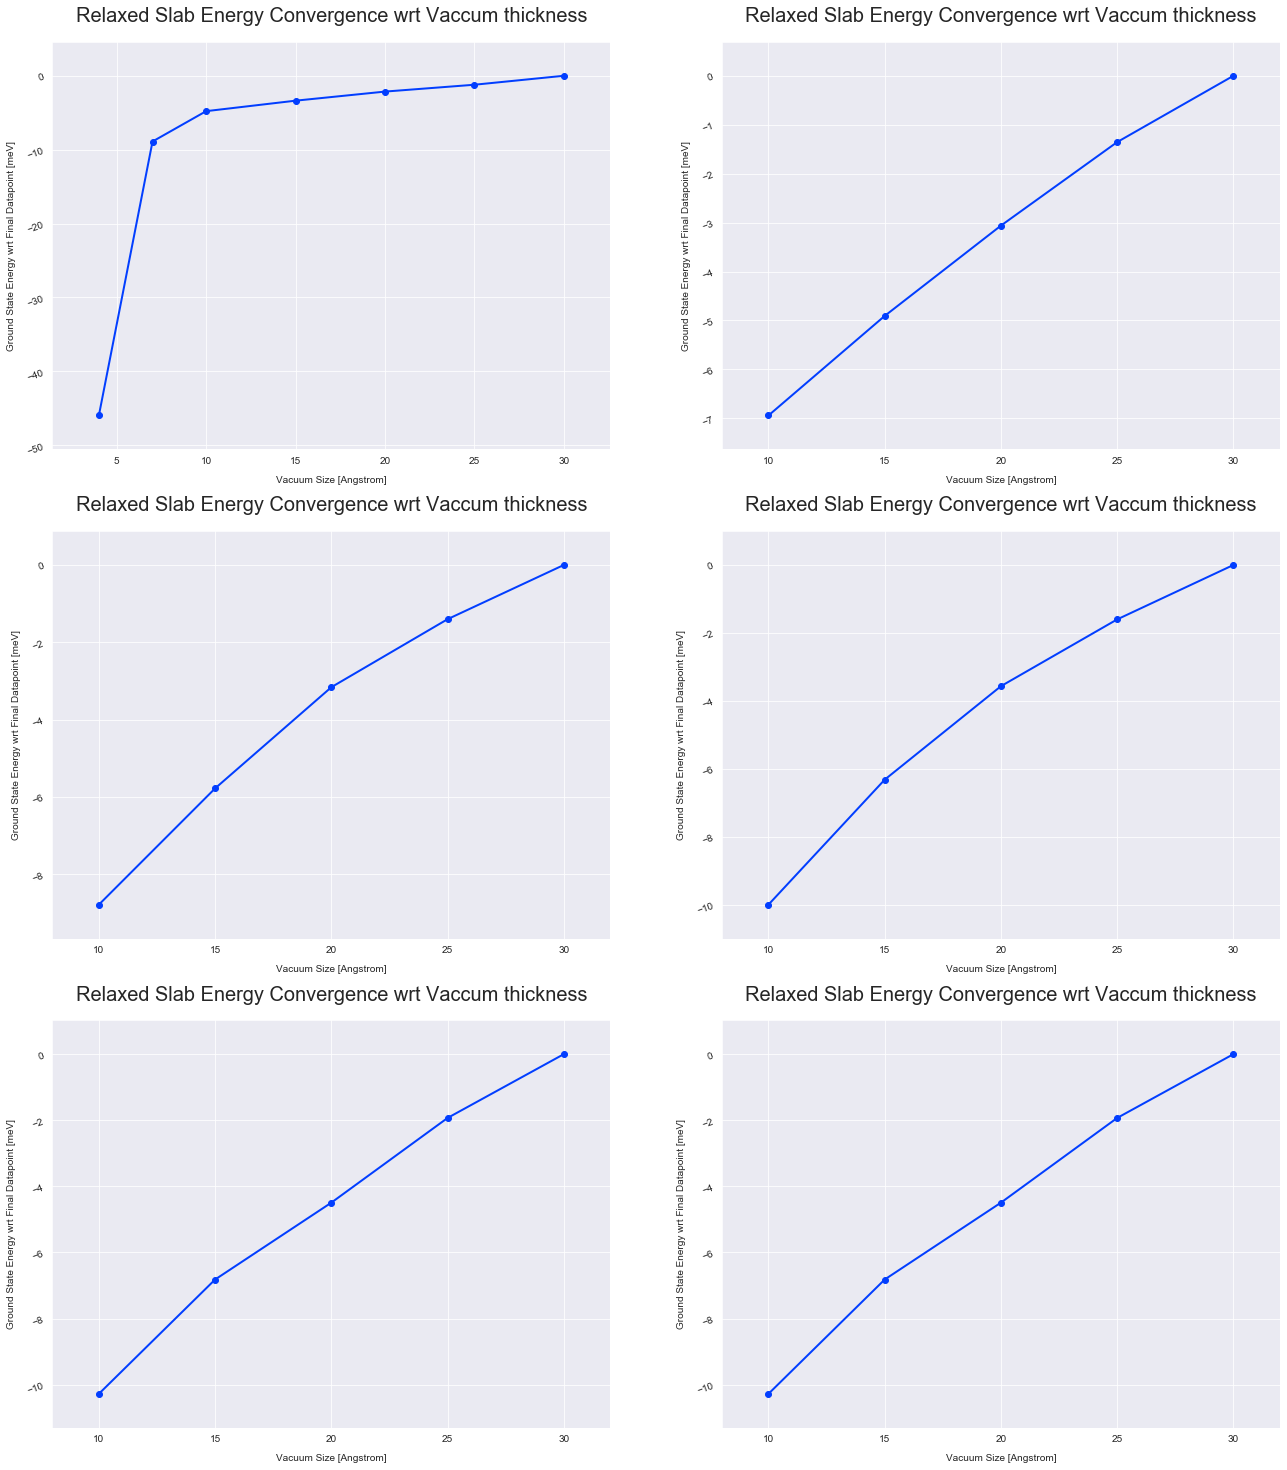

In [246]:
f, ax = plt.subplots(3, 2, figsize=(22, 35))
for i,thic in zip(ax.reshape(-1),[zerozeroone10,zerozeroone15,zerozeroone20,zerozeroone25,zerozeroone30,zerozeroone30]):
    i.plot(*zip(*thic), #color='steelblue',
           marker="o", label="Convergence E0", linewidth=2, linestyle='-')
    i.grid(True)
    i.set_xlabel("Vacuum Size [Angstrom]", labelpad=10)
    i.set_ylabel("Ground State Energy wrt Final Datapoint [meV]", labelpad=10)
    i.set_title("Relaxed Slab Energy Convergence wrt Vaccum thickness",
                fontsize=20, pad=20)  # pad is offset of title from plot
    # Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
    i.margins(0.1)
    i.ticklabel_format(useOffset=False)
    plt.setp(i.get_yticklabels(), rotation=20)
    f.subplots_adjust(bottom=0.3, top=0.85)  # Adjusting specific margins

Actually, it's a layered material, so it converges very quick wrt vacuum size (no surface dangling bonds).   
Let's double check this with 4 and 7 Angstrom vacuums. Yep, as expected, already converged at 10 Angstrom **for (001), because no dangling bonds, but unlikely for other terminations pal!!!**

In [205]:
dist = np.arange(4,9,3)
thickness = 10
for vac in dist:
    slabgen = SlabGenerator(structure, miller_index=(0,0,1), 
                            min_slab_size=thickness, min_vacuum_size =vac, lll_reduce=True)
    slabs = slabgen.get_slabs()
    slab = slabs[1] # <-- put a number in here! 
    #print(slab.lattice.c)
    #print(slab.miller_index) # just to check!
    if not os.path.exists('VASP_Files/optB86b-vdW/001_Slabs/slab_{0}_{1}/'.format(thickness,vac)):
        os.makedirs('VASP_Files/optB86b-vdW/001_Slabs/slab_{0}_{1}/'.format(thickness,vac))
    slab.to(fmt='poscar', filename='VASP_Files/optB86b-vdW/001_Slabs/slab_{0}_{1}/POSCAR'.format(thickness,vac))
    optB86bvdW_vasp_files(optB86bvdW_relaxed, input_dir='VASP_Files/optB86b-vdW/001_Slabs/slab_{0}_{1}'.format(thickness,vac))

### (111) Slab Convergence Test

In [19]:
structure = optB86bvdW_relaxed
slabgen = SlabGenerator(structure, miller_index=(1,1,1), 
                        min_slab_size=10, min_vacuum_size =10, lll_reduce=True)
slabs = slabgen.get_slabs()
for i in slabs:
    print(i.dipole)

[ 1.43739970e-15 -2.31384206e+00 -2.34745186e+01]
[ 1.38050658e-30 -1.44328993e-15 -1.77635684e-14]


In [23]:
import os
structure = optB86bvdW_relaxed
# These are distances in Angstroms
dist = [4,7,10,15,20,25,30]
# We iterate through the distances twice, once for vac, once for slab
for vac in dist:
    for thickness in dist:
        slabgen = SlabGenerator(structure, miller_index=(1,1,1), 
                                min_slab_size=thickness, min_vacuum_size=vac, lll_reduce=True)
        slabs = slabgen.get_slabs()
        slab = slabs[1] # <-- put a number in here! 
        #print(slab.miller_index) # just to check!
        if not os.path.exists('VASP_Files/optB86b-vdW/111_Slabs/slab_{0}_{1}/'.format(thickness,vac)):
            os.makedirs('VASP_Files/optB86b-vdW/111_Slabs/slab_{0}_{1}/'.format(thickness,vac))
        slab.to(fmt='poscar', filename='VASP_Files/optB86b-vdW/111_Slabs/slab_{0}_{1}/POSCAR'.format(thickness,vac))
        optB86bvdW_vasp_files(optB86bvdW_relaxed, input_dir='VASP_Files/optB86b-vdW/111_Slabs/slab_{0}_{1}'.format(thickness,vac))

In [1]:
#from pymatgen.entries.computed_entries import ComputedStructureEntry
from pymatgen.io.vasp.outputs import Vasprun
bulk_sno_vasprun = Vasprun("./VASP_Files/optB86b-vdW/bulk_rerun/vasprun.xml")
bulk_sno_entry = bulk_sno_vasprun.get_computed_entry()

/Users/kavanase/anaconda3/lib/python3.7/site-packages/pymatgen/io/vasp/inputs.py:1859: BadPotcarWarning: POTCAR with symbol Sn_d has metadata that does not match                          any VASP POTCAR known to pymatgen. The data in this                          POTCAR is known to match the following functionals:                          ['PBE_52', 'unvie_PBE_52', 'PBE_54']
  BadPotcarWarning)
/Users/kavanase/anaconda3/lib/python3.7/site-packages/pymatgen/io/vasp/inputs.py:1859: BadPotcarWarning: POTCAR with symbol O has metadata that does not match                          any VASP POTCAR known to pymatgen. The data in this                          POTCAR is known to match the following functionals:                          ['PBE_52', 'unvie_PBE_52', 'PBE_54']
  BadPotcarWarning)


In [2]:
# import scipy.constants as scpc
import os
from pymatgen.io.vasp.outputs import Vasprun
from pymatgen.analysis.surface_analysis import SlabEntry
oneoneone_slabs_vaspruns = {}
for root, dirs, files in os.walk("./VASP_Files/optB86b-vdW/111_Slabs/"):
    for name in files:
        if "vasprun" in name:
            #print(os.path.join(root, name))
            oneoneone_slabs_vaspruns[root[-10:]] = {'vasprun': Vasprun(os.path.join(root, name)), 'thickness': root[-5:-3],'vacuum': root[-2:]}
for k,v in oneoneone_slabs_vaspruns.items():
    v['final_energy'] = v['vasprun'].final_energy
    v['SlabEntry'] = SlabEntry.from_computed_structure_entry(v['vasprun'].get_computed_entry(),(1,1,1))
    v['SurfaceEnergyJm2'] = v['SlabEntry'].surface_energy(bulk_sno_entry)*scpc.electron_volt*10**20 # Convert eV/A^2 to J/m^2
   # v['TestSurfaceEnergy'] = ((v['final_energy']-(7*bulk_sno_entry.energy))/(2*14.68537370963767))*scpc.electron_volt*10**20 # Convert eV/A^2 to J/m^2

/Users/kavanase/anaconda3/lib/python3.7/site-packages/pymatgen/io/vasp/inputs.py:1859: BadPotcarWarning: POTCAR with symbol Sn_d has metadata that does not match                          any VASP POTCAR known to pymatgen. The data in this                          POTCAR is known to match the following functionals:                          ['PBE_52', 'unvie_PBE_52', 'PBE_54']
  BadPotcarWarning)
/Users/kavanase/anaconda3/lib/python3.7/site-packages/pymatgen/io/vasp/inputs.py:1859: BadPotcarWarning: POTCAR with symbol O has metadata that does not match                          any VASP POTCAR known to pymatgen. The data in this                          POTCAR is known to match the following functionals:                          ['PBE_52', 'unvie_PBE_52', 'PBE_54']
  BadPotcarWarning)


NameError: name 'scpc' is not defined

In [50]:
oneoneonethic10_vac = []; oneoneonethic10_energy = []
for k,v in oneoneone_slabs_vaspruns.items():
    if v['thickness'] == '10':
        oneoneonethic10_vac.append(float(v['vacuum']))
        oneoneonethic10_energy.append(v['SurfaceEnergyJm2'])
        oneoneonethic10 = sorted(zip(oneoneonethic10_vac, oneoneonethic10_energy), key = lambda t: t[0])

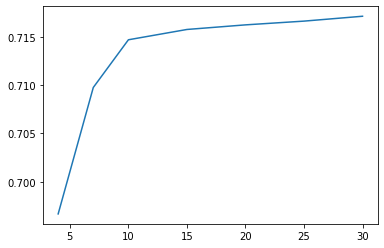

In [51]:
import matplotlib.pyplot as plt
plt.plot(*zip(*oneoneonethic10))

Converged at 10 Angstrom vacuum. Double check with 15 Angstrom thick slabs (so that vacuum convergence doesn't depend on slab thickness, which it shouldn't...), then just stick with 10 Angstrom vacuum and converge wrt slab size.

In [56]:
oneoneonethic15_vac = []; oneoneonethic15_energy = []
for k,v in oneoneone_slabs_vaspruns.items():
    if v['thickness'] == '15':
        oneoneonethic15_vac.append(float(v['vacuum']))
        oneoneonethic15_energy.append(v['SurfaceEnergyJm2'])
        oneoneonethic15 = sorted(zip(oneoneonethic15_vac, oneoneonethic15_energy), key = lambda t: t[0])

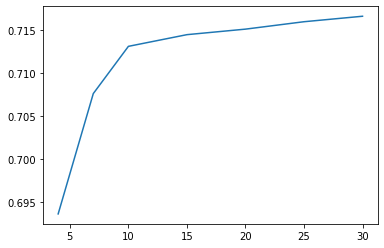

In [57]:
import matplotlib.pyplot as plt
plt.plot(*zip(*oneoneonethic15))

Yep, still converged at 10 Angstrom vac. Let's run convergence test wrt slab thickness, at 10 Angstrom vacuums.

In [1]:
# import scipy.constants as scpc
import os
from pymatgen.io.vasp.outputs import Vasprun
from pymatgen.analysis.surface_analysis import SlabEntry
oneoneone_slabs_vaspruns = {}
for root, dirs, files in os.walk("./VASP_Files/optB86b-vdW/111_Slabs/"):
    for name in files:
        if "vasprun" in name:
            #print(os.path.join(root, name))
            oneoneone_slabs_vaspruns[root[-10:]] = {'vasprun': Vasprun(os.path.join(root, name)), 'thickness': root[-5:-3],'vacuum': root[-2:]}
for k,v in oneoneone_slabs_vaspruns.items():
    v['final_energy'] = v['vasprun'].final_energy
    v['SlabEntry'] = SlabEntry.from_computed_structure_entry(v['vasprun'].get_computed_entry(),(1,1,1))
    v['SurfaceEnergyJm2'] = v['SlabEntry'].surface_energy(bulk_sno_entry)*scpc.electron_volt*10**20 # Convert eV/A^2 to J/m^2
   # v['TestSurfaceEnergy'] = ((v['final_energy']-(7*bulk_sno_entry.energy))/(2*14.68537370963767))*scpc.electron_volt*10**20 # Convert eV/A^2 to J/m^2

/Users/kavanase/anaconda3/lib/python3.7/site-packages/pymatgen/io/vasp/inputs.py:1859: BadPotcarWarning: POTCAR with symbol Sn_d has metadata that does not match                          any VASP POTCAR known to pymatgen. The data in this                          POTCAR is known to match the following functionals:                          ['PBE_52', 'unvie_PBE_52', 'PBE_54']
  BadPotcarWarning)
/Users/kavanase/anaconda3/lib/python3.7/site-packages/pymatgen/io/vasp/inputs.py:1859: BadPotcarWarning: POTCAR with symbol O has metadata that does not match                          any VASP POTCAR known to pymatgen. The data in this                          POTCAR is known to match the following functionals:                          ['PBE_52', 'unvie_PBE_52', 'PBE_54']
  BadPotcarWarning)


NameError: name 'bulk_sno_entry' is not defined

In [73]:
oneoneonevac10_thic = []; oneoneonevac10_energy = []
for k,v in oneoneone_slabs_vaspruns.items():
    if v['vacuum'] == '10':
        oneoneonevac10_thic.append(float(v['thickness']))
        oneoneonevac10_energy.append(v['SurfaceEnergyJm2'])
        oneoneonevac10 = sorted(zip(oneoneonevac10_thic, oneoneonevac10_energy), key = lambda t: t[0])

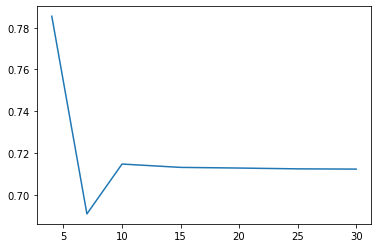

In [74]:
import matplotlib.pyplot as plt
plt.plot(*zip(*oneoneonevac10))

Ayo, yeah slab and vacuum thicknesses converged at 10 Angstrom

#### Relax all dipole free slabs

In [7]:
optB86bvdW_slabs_vacthic_10 = generate_all_slabs(optB86bvdW_relaxed, max_index=2, 
                                      min_slab_size=10, min_vacuum_size=10, lll_reduce=True)

In [8]:
dipole_free_slabs_vacthic_10 = []
for slab in optB86bvdW_slabs_vacthic_10:
    if not slab.is_polar():
        dipole_free_slabs_vacthic_10.append(slab)

In [9]:
for slab in dipole_free_slabs_vacthic_10: 
    print(f"{slab.miller_index[0]}{slab.miller_index[1]}{slab.miller_index[2]}_Slab")
    if not os.path.exists(f"VASP_Files/optB86b-vdW/{slab.miller_index[0]}{slab.miller_index[1]}{slab.miller_index[2]}_Slab"):
        os.makedirs(f"VASP_Files/optB86b-vdW/{slab.miller_index[0]}{slab.miller_index[1]}{slab.miller_index[2]}_Slab")
    slab.to(fmt='poscar', 
            filename=f"VASP_Files/optB86b-vdW/{slab.miller_index[0]}{slab.miller_index[1]}{slab.miller_index[2]}_Slab/POSCAR")
    optB86bvdW_vasp_files(optB86bvdW_relaxed, input_dir=f"VASP_Files/optB86b-vdW/{slab.miller_index[0]}{slab.miller_index[1]}{slab.miller_index[2]}_Slab")

111_Slab


NameError: name 'optB86bvdW_vasp_files' is not defined

In [13]:
for slab in dipole_free_slabs_vacthic_10: 
    print(f"{slab.miller_index[0]}{slab.miller_index[1]}{slab.miller_index[2]}_Slab")

111_Slab
221_Slab
212_Slab
212_Slab
211_Slab
210_Slab
101_Slab
201_Slab
100_Slab
112_Slab
102_Slab
102_Slab
001_Slab


In [18]:
from pymatgen.analysis.adsorption import AdsorbateSiteFinder
asf111 = AdsorbateSiteFinder(dipole_free_slabs_vacthic_10[0])

In [17]:
asf.find_adsorption_sites()

{'ontop': [array([ 2.87411251,  2.87411251, 15.14325403])],
 'bridge': [array([ 0.9580375 ,  0.9580375 , 15.14325403]),
  array([ 2.87411251,  0.9580375 , 15.14325403])],
 'hollow': [],
 'all': [array([ 2.87411251,  2.87411251, 15.14325403]),
  array([ 0.9580375 ,  0.9580375 , 15.14325403]),
  array([ 2.87411251,  0.9580375 , 15.14325403])]}

In [19]:
asf111.find_adsorption_sites()

{'ontop': [array([ 4.06460889,  4.6131138 , 12.83188421]),
  array([ 5.41947852,  0.74410192, 12.60251286])],
 'bridge': [array([ 4.7420437 ,  5.41818869, 12.44716287]),
  array([ 1.35486963,  0.74410192, 12.60251286]),
  array([ 4.06460889,  0.74410192, 12.60251286]),
  array([ 4.7420437 ,  2.67860786, 12.71719854]),
  array([ 6.77434815,  4.6131138 , 12.83188421]),
  array([ 6.09691333,  2.67860786, 12.71719854]),
  array([ 7.45178296,  5.41818869, 12.44716287])],
 'hollow': [array([ 1.35486963,  0.20738532, 12.85899376]),
  array([ 4.06460889,  2.03377254, 12.67896998]),
  array([ 1.80649284,  3.32344317, 12.7554271 ])],
 'all': [array([ 4.06460889,  4.6131138 , 12.83188421]),
  array([ 5.41947852,  0.74410192, 12.60251286]),
  array([ 4.7420437 ,  5.41818869, 12.44716287]),
  array([ 1.35486963,  0.74410192, 12.60251286]),
  array([ 4.06460889,  0.74410192, 12.60251286]),
  array([ 4.7420437 ,  2.67860786, 12.71719854]),
  array([ 6.77434815,  4.6131138 , 12.83188421]),
  array([ 6

In [10]:
#from pymatgen.entries.computed_entries import ComputedStructureEntry
from pymatgen.io.vasp.outputs import Vasprun
bulk_sno_vasprun = Vasprun("./VASP_Files/optB86b-vdW/bulk_rerun/vasprun.xml")
bulk_sno_entry = bulk_sno_vasprun.get_computed_entry()

In [11]:
import scipy.constants as scpc
import os
from pymatgen.io.vasp.outputs import Vasprun
from pymatgen.analysis.surface_analysis import SlabEntry
dipolefree_slabs_vaspruns = {}
for root, dirs, files in os.walk("./VASP_Files/optB86b-vdW/"):
    for name in files:
        if "_Slab" in root[-10:]:
            if "vasprun" in name:
                #print(os.path.join(root, name))
                dipolefree_slabs_vaspruns[root[-8:]] = {'vasprun': Vasprun(os.path.join(root, name)), 
                                                         'thickness': 10,'vacuum': 10,
                                                        'miller index': (int(root[-8]),int(root[-7]),int(root[-6]))}

for k,v in dipolefree_slabs_vaspruns.items():
    v['final_energy'] = v['vasprun'].final_energy
    v['SlabEntry'] = SlabEntry.from_computed_structure_entry(v['vasprun'].get_computed_entry(),
                                                             v['miller index'])
    v['SurfaceEnergyJm2'] = v['SlabEntry'].surface_energy(bulk_sno_entry)*scpc.electron_volt*10**20 # Convert eV/A^2 to J/m^2
   # v['TestSurfaceEnergy'] = ((v['final_energy']-(7*bulk_sno_entry.energy))/(2*14.68537370963767))*scpc.electron_volt*10**20 # Convert eV/A^2 to J/m^2

In [87]:
dipolefree_slabs_vaspruns

{'212_Slab': {'vasprun': <pymatgen.io.vasp.outputs.Vasprun at 0x1a35874d10>,
  'thickness': 10,
  'vacuum': 10,
  'miller index': (2, 1, 2),
  'final_energy': -103.9633113,
  'SlabEntry': ComputedStructureEntry None - Sn16 O16
  Energy = -103.9633
  Correction = 0.0000
  Parameters:
  Data:,
  'SurfaceEnergyJm2': 0.6422016591389741},
 '101_Slab': {'vasprun': <pymatgen.io.vasp.outputs.Vasprun at 0x1a353698d0>,
  'thickness': 10,
  'vacuum': 10,
  'miller index': (1, 0, 1),
  'final_energy': -52.3464057,
  'SlabEntry': ComputedStructureEntry None - Sn8 O8
  Energy = -52.3464
  Correction = 0.0000
  Parameters:
  Data:,
  'SurfaceEnergyJm2': 0.5651770744325313},
 '100_Slab': {'vasprun': <pymatgen.io.vasp.outputs.Vasprun at 0x1a32d68210>,
  'thickness': 10,
  'vacuum': 10,
  'miller index': (1, 0, 0),
  'final_energy': -39.10836895,
  'SlabEntry': ComputedStructureEntry None - Sn6 O6
  Energy = -39.1084
  Correction = 0.0000
  Parameters:
  Data:,
  'SurfaceEnergyJm2': 0.6087742296660097},

In [7]:
for k,v in dipolefree_slabs_vaspruns.items():
    print(v['miller index'],v['SurfaceEnergyJm2'])
    #print(f"{v['miller index'][0]}{v['miller index'][1]}{v['miller index'][2]}")
    #print(v['SlabEntry'].miller_index)

(2, 1, 2) 0.6422016591389741
(1, 0, 1) 0.5651770744325313
(1, 0, 0) 0.6087742296660097
(1, 1, 1) 0.7147014901400125
(0, 0, 1) 0.2539834031098148
(2, 2, 1) 1.2978977938618295
(2, 0, 1) 0.6139382590300689
(1, 1, 2) 0.6102919624942392
(2, 1, 0) 0.7726774157457553
(1, 0, 2) 0.4824029952064773


Double check (1,0,2) and (1,0,1) with `EDIFFG = -0.001` and `IBRION = 2`. Yep all good.

In [8]:
from pymatgen.analysis.wulff import WulffShape

In [45]:
sno_miller_indices = []
sno_surface_energies_jm2 = []
for k,v in dipolefree_slabs_vaspruns.items():
    if v['miller index'] in [(0,0,1)]:
        print("Fuck that shit")
        c_energy = v['SurfaceEnergyJm2']
    else:
        sno_miller_indices.append(v['miller index']) # Might need to reformat this
        sno_surface_energies_jm2.append(v['SurfaceEnergyJm2'])
sno_miller_indices.append((0.00000000001, 0, 1))
sno_surface_energies_jm2.append(c_energy)
wulff_sno = WulffShape(optB86bvdW_relaxed.lattice,sno_miller_indices,sno_surface_energies_jm2)

Fuck that shit


In [107]:
import stackprinter as sp

In [41]:
wulff_sno.miller_area_dict

{(2, 1, 2): 0.7194002858808375,
 (1, 0, 1): 0.4999368606717957,
 (1, 0, 0): 0.922244709849694,
 (1, 1, 1): 0.008949753600310164,
 (2, 2, 1): 0.0,
 (2, 0, 1): 0.14199946451842554,
 (1, 1, 2): 0.0043467708475367324,
 (2, 1, 0): 0.025648333794395333,
 (1, 0, 2): 0.21319368081609663,
 (0.0, 0, 1.1): 1.9671172819884633}

In [59]:
print("Shape factor: %.3f, Anisotropy: \
%.3f, Weighted surface energy: %.3f J/m^2" %(wulff_sno.shape_factor, 
                                       wulff_sno.anisotropy,
                                       wulff_sno.weighted_surface_energy))
# Typically in the literature when discussing surface anisotropy, we would only look at the ratios of 
# 2 surface energies when talking about anisotropy. eg. the ratio of a generic fcc (111) to (100) 
# surface energy should be less than 1 as the (111) facet is the closest packed surface of an fcc 
# structure and should have the lowest surface energy. However this method of determining surface 
# anisotropy does not allow us to determine an overall anisotropy of a material, ie. how different 
# are all the surface energies for a material. As such, we used the Coefficient of Variation from the 
# weighted surface energy. For reference, an ideal sphere Wulff shape (eg. completely isotropic) has 
# a anisotropy of 0.
# shape_factor:
# An alternative to anisotropy. This is useful for determining the critical nucleus size. A 
# large shape factor indicates great anisotropy. See Ballufi, R. W., Allen, S. M. & Carter, 
# W. C. Kinetics of Materials. (John Wiley & Sons, 2005), p.461

Shape factor: 5.853, Anisotropy: 0.391, Weighted surface energy: 0.450 J/m^2


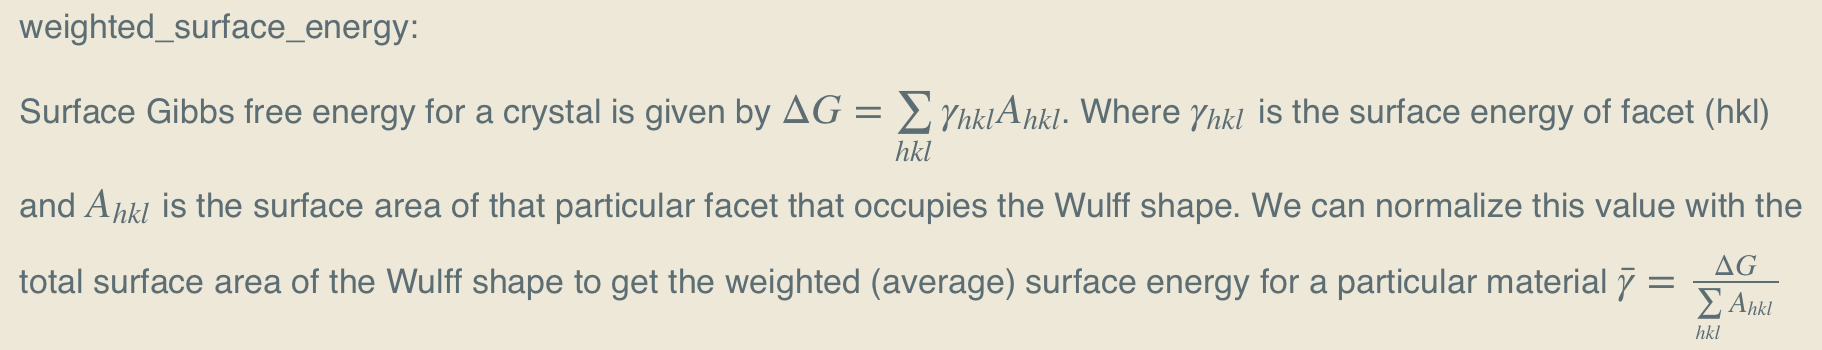

In [52]:
%matplotlib widget
wulff_plot = wulff_sno.get_plot(color_set='plasma', grid_off=False, show_area = True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [23]:
import macrodensity as md
import io
import sys
import matplotlib.pyplot as plt; import matplotlib as mpl

In [66]:
input_file = 'VASP_Files/optB86b-vdW/001_Slab/LOCPOT'
lattice_vector = (4.8); output_file = 'whofuckingcares.dat'
# create a text trap and redirect stdout (I've seen Macrodensity's big BOOM enough fucking times...)
text_trap = io.StringIO(); old_stdout = sys.stdout; sys.stdout = text_trap
vasp_pot, NGX, NGY, NGZ, Lattice = md.read_vasp_density(input_file) # execute our now mute functions
vector_a,vector_b,vector_c,av,bv,cv = md.matrix_2_abc(Lattice) 
resolution_x = vector_a/NGX; resolution_y = vector_b/NGY; resolution_z = vector_c/NGZ
grid_pot, electrons = md.density_2_grid(vasp_pot,NGX,NGY,NGZ)
sys.stdout = old_stdout # now restore stdout function
planar001 = md.planar_average(grid_pot,NGX,NGY,NGZ); macro  = md.macroscopic_average(planar,lattice_vector,resolution_z)
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10,4)); textsize = 22
mpl.rcParams['xtick.labelsize'] = textsize; mpl.rcParams['ytick.labelsize'] = textsize; plt.rcParams['legend.title_fontsize'] = 22
ax.plot(planar001,label="Planar",lw=3); ax.plot(macro,label="Macroscopic",lw=3); 
plt.setp(ax, xlim=(0,len(planar)), facecolor=((0.95,0.95,0.95))); ax.grid(True); plt.show()
#print(f"Using plateaus in the centre of each slab: Offset (Bi relative to Sb) = {macro[91]-macro[270]:.4f} V")

Average of the average =  6.158037043254202e-15


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [78]:
input_file = 'VASP_Files/optB86b-vdW/101_Slab/LOCPOT'
lattice_vector = (4.8); output_file = 'whofuckingcares.dat'
# create a text trap and redirect stdout (I've seen Macrodensity's big BOOM enough fucking times...)
text_trap = io.StringIO(); old_stdout = sys.stdout; sys.stdout = text_trap
vasp_pot, NGX, NGY, NGZ, Lattice = md.read_vasp_density(input_file) # execute our now mute functions
vector_a,vector_b,vector_c,av,bv,cv = md.matrix_2_abc(Lattice) 
resolution_x = vector_a/NGX; resolution_y = vector_b/NGY; resolution_z = vector_c/NGZ
grid_pot, electrons = md.density_2_grid(vasp_pot,NGX,NGY,NGZ)
sys.stdout = old_stdout # now restore stdout function
planar = md.planar_average(grid_pot,NGX,NGY,NGZ); macro  = md.macroscopic_average(planar,lattice_vector,resolution_z)
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10,4)); textsize = 22
mpl.rcParams['xtick.labelsize'] = textsize; mpl.rcParams['ytick.labelsize'] = textsize; plt.rcParams['legend.title_fontsize'] = 22
ax.plot(planar,label="Planar",lw=3); ax.plot(planar001,label="Planar",lw=3) #ax.plot(macro,label="Macroscopic",lw=3); 
plt.setp(ax, xlim=(0,len(planar)), facecolor=((0.95,0.95,0.95))); ax.grid(True); plt.show()
#print(f"Using plateaus in the centre of each slab: Offset (Bi relative to Sb) = {macro[91]-macro[270]:.4f} V")

Average of the average =  6.158037043254202e-15


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [79]:
import scipy.constants as scpc
import os
from pymatgen.io.vasp.outputs import Vasprun
from pymatgen.analysis.surface_analysis import SlabEntry, SurfaceEnergyPlotter, NanoscaleStability
sno_slab_entries = []
for k,v in dipolefree_slabs_vaspruns.items():
    sno_slab_entries.append(v['SlabEntry'])
   # v['TestSurfaceEnergy'] = ((v['final_energy']-(7*bulk_sno_entry.energy))/(2*14.68537370963767))*scpc.electron_volt*10**20 # Convert eV/A^2 to J/m^2

In [82]:
sep = SurfaceEnergyPlotter(sno_slab_entries, bulk_sno_entry)

In [85]:
nanostability = NanoscaleStability(sep)

In [87]:
nanostability.bulk_gform(bulk_sno_entry)

-0.1918272420298531

In [93]:
%matplotlib nbagg
nanostability.plot_one_stability_map(sep,100)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<module 'matplotlib.pyplot' from '/Users/kavanase/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

#### First attempt with SCAN+rVV10 (abandoning for the moment, let's go with `optB86b-vdW`)

Useful SCAN+rVV10 info if we decide to return to it:
- https://sites.google.com/site/haoweipeng/softwares
- https://www.researchgate.net/publication/334752617_Treating_different_bonding_situations_Revisiting_Au-Cu_alloys_using_the_random_phase_approximation
- https://templeefrc.org/scan-overview
- https://arxiv.org/pdf/1704.07922.pdf

In [1]:
from pymatgen.core.surface import SlabGenerator, generate_all_slabs, Structure, Lattice
import pymatgen.symmetry.analyzer as pmgsyman

In [2]:
SCAN_rVV10_relaxed = Structure.from_file("VASP_Files/SCAN_rVV10/CONTCAR")
SCAN_rVV10_relaxed.add_oxidation_state_by_guess()

In [3]:
SCAN_rVV10_relaxed

Structure Summary
Lattice
    abc : 3.7721806675846494 3.7721806675846494 4.643895879436442
 angles : 90.0 90.0 90.0
 volume : 66.07960584882113
      A : 3.7721806675846494 -0.0 -0.0
      B : -0.0 3.7721806675846494 -0.0
      C : 0.0 0.0 4.643895879436442
PeriodicSite: Sn2+ (2.8291, 2.8291, 1.1576) [0.7500, 0.7500, 0.2493]
PeriodicSite: Sn2+ (0.9430, 0.9430, 3.4863) [0.2500, 0.2500, 0.7507]
PeriodicSite: O2- (0.9430, 2.8291, 0.0000) [0.2500, 0.7500, 0.0000]
PeriodicSite: O2- (2.8291, 0.9430, 0.0000) [0.7500, 0.2500, -0.0000]

In [4]:
spganalyse = pmgsyman.SpacegroupAnalyzer(SCAN_rVV10_relaxed)

In [5]:
spganalyse.get_conventional_standard_structure()

Structure Summary
Lattice
    abc : 3.7721806675846494 3.7721806675846494 4.643895879436442
 angles : 90.0 90.0 90.0
 volume : 66.07960584882113
      A : 3.7721806675846494 0.0 2.3097944901815335e-16
      B : -2.3097944901815335e-16 3.7721806675846494 2.3097944901815335e-16
      C : 0.0 0.0 4.643895879436442
PeriodicSite: Sn2+ (-0.0000, 1.8861, 1.1576) [0.0000, 0.5000, 0.2493]
PeriodicSite: Sn2+ (1.8861, 0.0000, 3.4863) [0.5000, 0.0000, 0.7507]
PeriodicSite: O2- (1.8861, 1.8861, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: O2- (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]

In [6]:
spganalyse.get_conventional_to_primitive_transformation_matrix()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [30]:
SCAN_rVV10_slabs = generate_all_slabs(SCAN_rVV10_relaxed, max_index=2, min_slab_size=20, min_vacuum_size=20, lll_reduce=True)

In [32]:
for slab in SCAN_rVV10_slabs:
    print(slab.miller_index,slab.dipole)

(1, 1, 1) [ 2.54474454e-15 -2.48692851e+00 -4.15588322e+01]
(1, 1, 1) [-3.94430453e-31 -1.33226763e-15  7.10542736e-15]
(2, 2, 1) [  2.65465705  -2.11418599 -40.87867338]
(2, 2, 1) [-2.66453526e-15  5.44009282e-15  1.10134124e-13]
(1, 1, 0) [ 2.61323416e-15  2.61323416e-15 -4.26773525e+01]
(2, 1, 2) [-1.99840144e-15  3.88578059e-16  1.77635684e-14]
(2, 1, 2) [-8.88178420e-16  0.00000000e+00  4.97379915e-14]
(2, 1, 1) [-3.33066907e-16  1.44328993e-15  0.00000000e+00]
(2, 1, 1) [-1.07736285 -0.73601836 44.37740365]
(2, 1, 0) [ 7.88860905e-31  2.22044605e-15 -4.61852778e-14]
(1, 0, 1) [-2.50495324e-15 -2.59549883e+00  4.09089910e+01]
(1, 0, 1) [-9.86076132e-31 -4.44089210e-16  7.10542736e-15]
(2, 0, 1) [ 1.97215226e-31 -4.44089210e-15  3.01980663e-14]
(2, 0, 1) [-2.56141770e-15 -3.00808442e+00  4.18311256e+01]
(1, 0, 0) [ 0.00000000e+00 -1.97215226e-31  0.00000000e+00]
(1, 1, 2) [-1.97215226e-30 -6.10622664e-16 -2.13162821e-14]
(1, 0, 2) [-7.88860905e-31  2.22044605e-16  6.75015599e-14]
(

In [34]:
dipole_free_slabs = []
for slab in SCAN_rVV10_slabs:
    if not slab.is_polar():
        dipole_free_slabs.append(slab)

In [36]:
for slab in dipole_free_slabs:
    print(slab.miller_index,slab.dipole)

(1, 1, 1) [-3.94430453e-31 -1.33226763e-15  7.10542736e-15]
(2, 2, 1) [-2.66453526e-15  5.44009282e-15  1.10134124e-13]
(2, 1, 2) [-1.99840144e-15  3.88578059e-16  1.77635684e-14]
(2, 1, 2) [-8.88178420e-16  0.00000000e+00  4.97379915e-14]
(2, 1, 1) [-3.33066907e-16  1.44328993e-15  0.00000000e+00]
(2, 1, 0) [ 7.88860905e-31  2.22044605e-15 -4.61852778e-14]
(1, 0, 1) [-9.86076132e-31 -4.44089210e-16  7.10542736e-15]
(2, 0, 1) [ 1.97215226e-31 -4.44089210e-15  3.01980663e-14]
(1, 0, 0) [ 0.00000000e+00 -1.97215226e-31  0.00000000e+00]
(1, 1, 2) [-1.97215226e-30 -6.10622664e-16 -2.13162821e-14]
(1, 0, 2) [-7.88860905e-31  2.22044605e-16  6.75015599e-14]
(1, 0, 2) [-1.97215226e-31 -1.11022302e-15 -2.13162821e-14]
(0, 0, 1) [-1.18329136e-30 -1.57772181e-30  1.42108547e-14]


In [44]:
import os
structure = SCAN_rVV10_relaxed
# These are distances in Angstroms
dist = [10,20,30]
# We iterate through the distances twice, once for vac, once for slab
for vac in dist:
    for thickness in dist:
        slabgen = SlabGenerator(structure, miller_index=(0,0,1), 
                                min_slab_size=thickness, min_vacuum_size =vac,lll_reduce=True)
        slabs = slabgen.get_slabs()
        slab = slabs[1] # <-- put a number in here! 
        os.makedirs('VASP_Files/SCAN_rVV10/001_Slabs/slab_{0}_{1}/'.format(thickness,vac))
        slab.to(fmt='poscar', filename='VASP_Files/SCAN_rVV10/001_Slabs/slab_{0}_{1}/POSCAR'.format(thickness,vac))

In [26]:
test = pmgsydipole_free_slabsSpacegroupAnalyzer(
    all_slabs[-2]).get_conventional_standard_structure()
test.to(fmt='POSCAR',filename='testPOSCAR')

### Let's start with a DFT convergence test wrt Slab size

## Ground-State Energy Convergence Tests (on me own laptop yuppa)

`PSMAXN` warning encountered for `ENCUT = 900` and above.    
Converged at `ENCUT = 850` and **_k_**-mesh of $8\times8\times6$ for SCAN metaGGA, `ENCUT = 700` and $6\times6\times4$ for vanilla GGA.

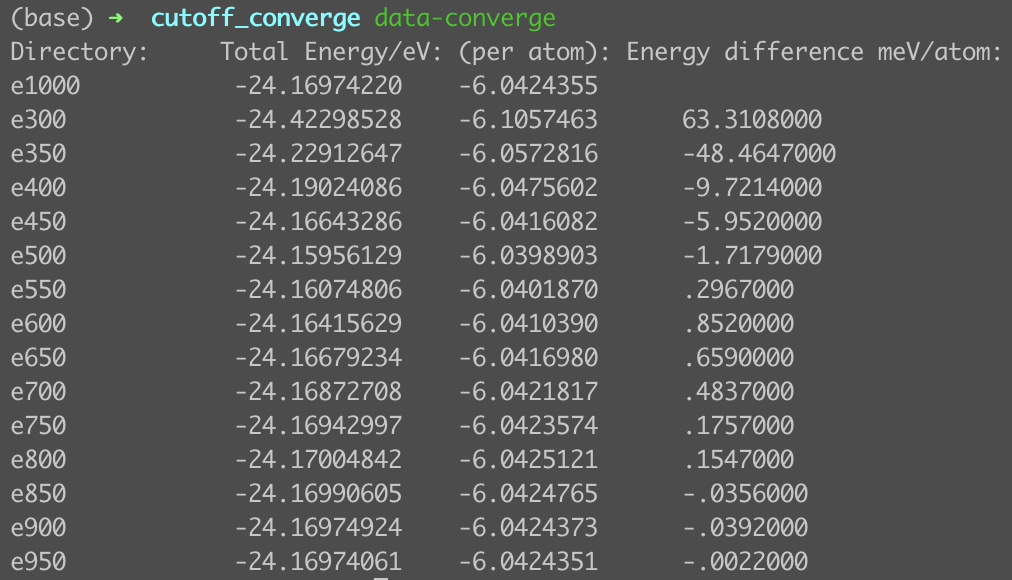

Convergence test with SCAN metaGGA: (Converged at `ENCUT = 850`)

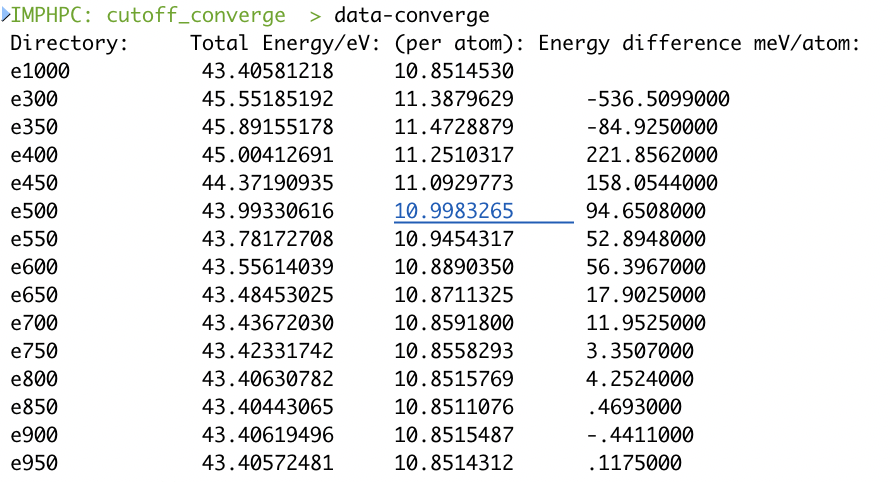

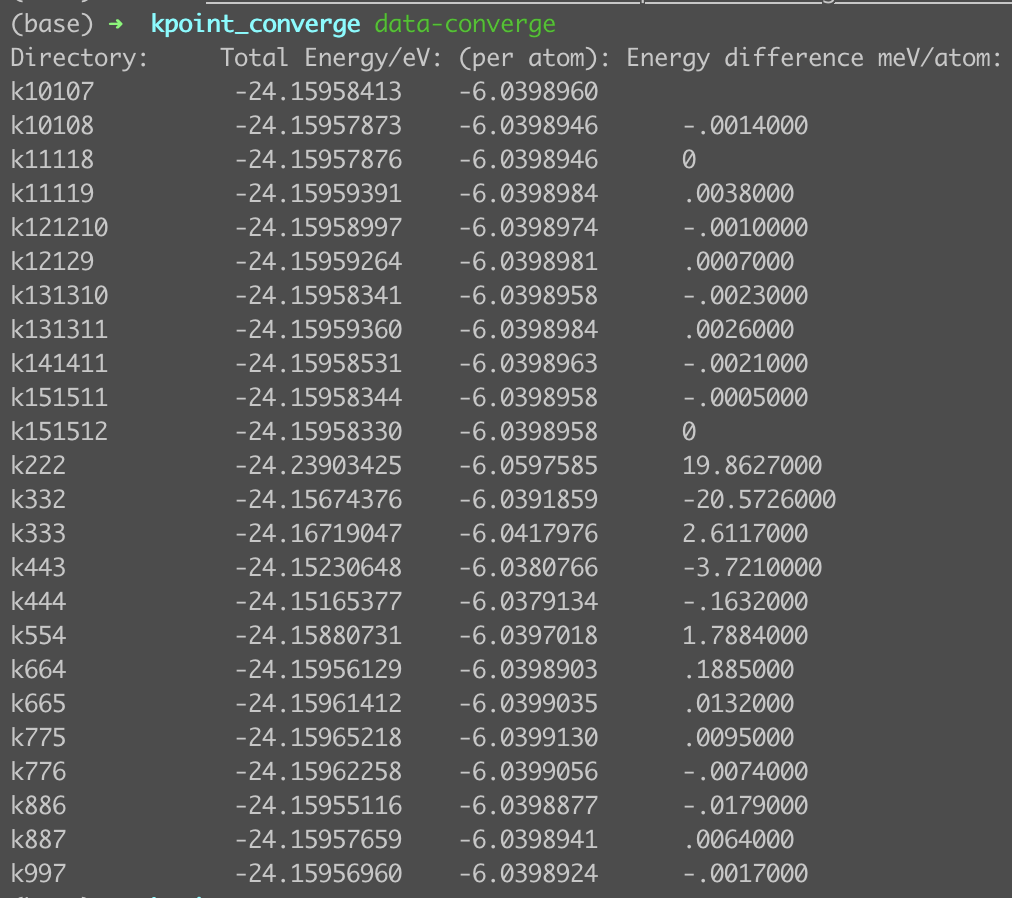

Convergence test with SCAN metaGGA: (Converged k-point density = $8\times8\times6$)

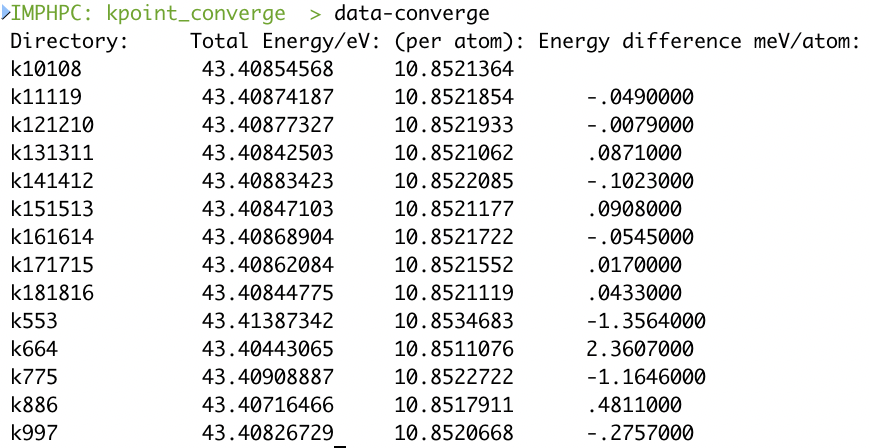